## Set up environment

In [1]:
# Set up environment
import warnings;
warnings.filterwarnings('ignore');
from IPython.core.interactiveshell import InteractiveShell;
InteractiveShell.ast_node_interactivity = "all";
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from matplotlib.lines import Line2D;
from sklearn import preprocessing
import statsmodels.formula.api as smf
from utils import get_data

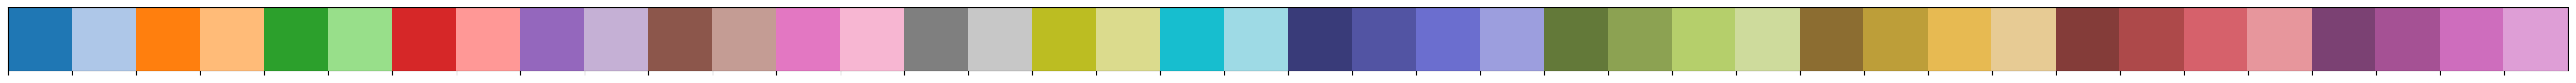

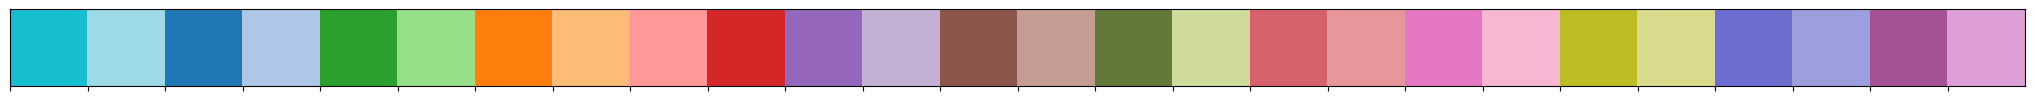

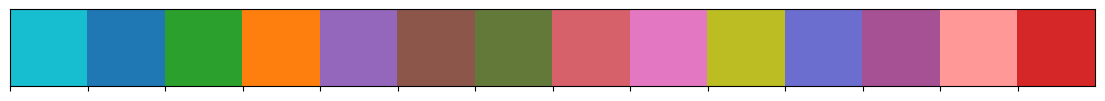

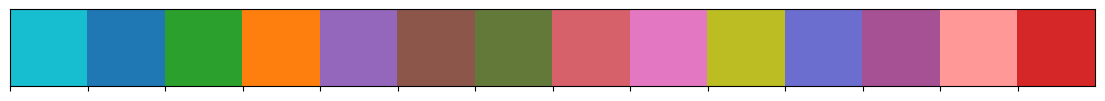

In [2]:
#plotting parameters, these will be the same for all plots

bundles = ['AFL', 'AFR', 'ATRL', 'ATRR', 'CCL', 'CCR', 'CSL', 'CSR', 'FcMi', 'FcMa', 'IFOFL', 'IFOFR', 'ILFL', 'ILFR',
                  'MLFL', 'MLFR', 'ORL', 'ORR', 'SLFL', 'SLFR', 'UNCL', 'UNCR', 'VOFL', 'VOFR', 'pAFL', 'pAFR']
rightBundles = ['AFR', 'ATRR', 'CCR', 'CSR', 'FcMi', 'FcMa', 'IFOFR', 'ILFR', 'MLFR', 'ORR', 'pAFR', 'SLFR', 'UNCR', 'VOFR']
leftBundles = ['AFL', 'ATRL', 'CCL', 'CSL', 'FcMi', 'FcMa', 'IFOFL', 'ILFL', 'MLFL', 'ORL', 'pAFL', 'SLFL', 'UNCL', 'VOFL']


tractPosHorz = {'AF': (0,0), 'ATR': (0, 1), 'CC': (0, 2), 'CS': (0, 3),
            'IFOF':(1,0), 'ILF':(1,1), 'MLF':(1,2), 'OR': (1,3),
            'SLF': (2, 0),  'UNC':(2,1), 'VOF': (2, 2), 'pAF': (2,3),
            'FcMi': (3, 1), 'FcMa': (3, 2)};

tracts=['AF', 'ATR', 'CC', 'CS', 'IFOF', 'ILF', 'MLF', 'OR', 'SLF', 'UNC', 'VOF', 'pAF', 'FcMi', 'FcMa']
colors=['cyan', 'blue', 'green', 'orange', 'purple', 'brown', 'olive', 'coral', 'fuchsia', 'yellow', 'indigo', 'violet', 'salmon', 'red']

color_list_all=sns.color_palette("tab20")+sns.color_palette("tab20b")
color_list_complete=color_list_all
color_list_chosen=color_list_all[18:20]
color_list_chosen.extend(color_list_all[0:2])
color_list_chosen.extend(color_list_all[4:6])
color_list_chosen.extend(color_list_all[2:4])
color_list_chosen.extend(color_list_all[7:8])
color_list_chosen.extend(color_list_all[6:7])
color_list_chosen.extend(color_list_all[8:10])
color_list_chosen.extend(color_list_all[10:12])
color_list_chosen.extend(color_list_all[24:25])
color_list_chosen.extend(color_list_all[27:28])
color_list_chosen.extend(color_list_all[34:35])
color_list_chosen.extend(color_list_all[35:36])
color_list_chosen.extend(color_list_all[12:14])
color_list_chosen.extend(color_list_all[16:18])
color_list_chosen.extend(color_list_all[22:23])
color_list_chosen.extend(color_list_all[23:24])
color_list_chosen.extend(color_list_all[37:38])
color_list_chosen.extend(color_list_all[39:40])

sns.palplot(color_list_all)
sns.palplot(color_list_chosen)
color_list_all=color_list_chosen
color_order=[19, 18, 1, 0, 5, 4, 3, 2, 7, 6, 9, 8, 11, 10, 15, 14, 21, 20, 25, 24, 13, 12, 17, 16, 23, 22]

color_list_nohemis=sns.color_palette("tab20")+sns.color_palette("tab20b")
color_list_complete_nohemis=color_list_nohemis
color_list_chosen_nohemis=color_list_nohemis[18:19]
color_list_chosen_nohemis.extend(color_list_nohemis[0:1])
color_list_chosen_nohemis.extend(color_list_nohemis[4:5])
color_list_chosen_nohemis.extend(color_list_nohemis[2:3])
color_list_chosen_nohemis.extend(color_list_nohemis[8:9])
color_list_chosen_nohemis.extend(color_list_nohemis[10:11])
color_list_chosen_nohemis.extend(color_list_nohemis[24:25])
color_list_chosen_nohemis.extend(color_list_nohemis[34:35])
color_list_chosen_nohemis.extend(color_list_nohemis[12:13])
color_list_chosen_nohemis.extend(color_list_nohemis[16:17])
color_list_chosen_nohemis.extend(color_list_nohemis[22:23])
color_list_chosen_nohemis.extend(color_list_nohemis[37:38])
color_list_chosen_nohemis.extend(color_list_nohemis[7:8])
color_list_chosen_nohemis.extend(color_list_nohemis[6:7])
sns.palplot(color_list_chosen_nohemis)

color_order2=[19, 18, 5, 4, 9, 8, 11, 10, 15, 14, 21, 20, 25, 24, 13, 12, 17, 16, 23, 22, 7, 6]

color_list_3=sns.color_palette("tab20")+sns.color_palette("tab20b")
color_list_complete3=color_list_3
color_list_chosen3=color_list_3[18:19]
color_list_chosen3.extend(color_list_3[0:1])
color_list_chosen3.extend(color_list_3[4:5])
color_list_chosen3.extend(color_list_3[2:3])
color_list_chosen3.extend(color_list_3[8:9])
color_list_chosen3.extend(color_list_3[10:11])
color_list_chosen3.extend(color_list_3[24:25])
color_list_chosen3.extend(color_list_3[34:35])
color_list_chosen3.extend(color_list_3[12:13])
color_list_chosen3.extend(color_list_3[16:17])
color_list_chosen3.extend(color_list_3[22:23])
color_list_chosen3.extend(color_list_3[37:38])
color_list_chosen3.extend(color_list_3[7:8])
color_list_chosen3.extend(color_list_3[6:7])
sns.palplot(color_list_chosen3)


color_order3=[19, 1, 5, 3, 9, 11, 25, 35, 13, 17, 23, 38, 8, 7]

In [3]:
get_data()

In [4]:
slope_analyses_mean=pd.read_csv('./inputData/GMandWMT1wT2wSubjectsAge.csv', index_col=None)
SlopeDataframe=pd.read_csv('./inputData/R1Slope.csv', index_col=None)

## T1w/T2w

In [5]:
#Compute slope for scan age for T1w/T2w of white matter

tractCount=slope_analyses_mean['tractID'].unique()

coeff=[] #Creating arrays
se = []
coeffType=[]
tractTrack1=[]
intercept=[]
r2 = []
adjustR2 = []
aic = []
pvals=[]

for tract in tractCount:

    dfForStats=slope_analyses_mean[(slope_analyses_mean['tractID']==tract)]
    dfForStats.reset_index(level=0, inplace=True)

    scanAgeArray=np.array(dfForStats['scan_age'])
    scanAgeArray=scanAgeArray.reshape(1,-1)
    scanAgeNorm=preprocessing.normalize(scanAgeArray,axis=1)
    scanAgeNorm=scanAgeNorm.reshape(-1)
    dfForStats["scanAgeNorm"]=scanAgeNorm

    birthAgeArray=np.array(dfForStats['birth_age'])
    birthAgeArray=birthAgeArray.reshape(1,-1)
    birthAgeNorm=preprocessing.normalize(birthAgeArray,axis=1)
    birthAgeNorm=birthAgeNorm.reshape(-1)
    dfForStats["birthAgeNorm"]=birthAgeNorm

    t1wt2wArray=np.array(dfForStats['t1wt2w'])
    t1wt2wArray=t1wt2wArray.reshape(1,-1)
    t1wt2wNorm=preprocessing.normalize(t1wt2wArray,axis=1)
    t1wt2wNorm=t1wt2wNorm.reshape(-1)
    dfForStats["t1wt2wNorm"]=t1wt2wNorm

    df = dfForStats
    md = smf.ols(formula="t1wt2w~ 1 + scan_age", data=df) #Predicting dti_mdNorm through the other variables
    mdf = md.fit() # Actually commanding the linear analysis, it could be any other analysis method
    results=mdf.summary()

    # Note that tables is a list. The table at index 1 is the "core" table. Additionally, read_html puts dfs in a list, so we want index 0
    results_as_html = results.tables[1].as_html()
    LM_results=pd.read_html(results_as_html, header=0, index_col=0)[0]

    results_as_html_R2 = results.tables[0].as_html()
    LM_results_R2=pd.read_html(results_as_html_R2, index_col=0)[0]

    results_R2s=LM_results_R2[3]
    #LM_results.head()
    #LM_results_R2.head()
    #results_R2s.head()

    SE=LM_results['std err']

    inter=mdf.params['Intercept']
    intercept.append(inter)

    #SE.head()
    se.append(SE["scan_age"])
    coeff.append(mdf.params['scan_age'])
    coeff_type=3
    tractTrack1.append(tract)
    #nodeTrack1.append(node)
    coeffType.append(coeff_type) #Add another line below
    r2.append(results_R2s['Dep. Variable:'])
    adjustR2.append(results_R2s['Model:'])
    aic.append(results_R2s['No. Observations:'])
    pvals.append(results_R2s['Date:'])

print(mdf.summary())
df=pd.DataFrame(tractTrack1)
df.columns=['tractID']
df.insert(1,"coeffType",coeffType)
df.insert(2,"coeff",coeff)
df.insert(3,"se",se)
df.insert(4,"intercept",intercept)
df.insert(5,"r2",r2)
df.insert(6,"adjustR2",adjustR2)
df.insert(7,"aic",aic)
df.insert(8,"pvals",pvals)

os.makedirs('./outputData',exist_ok=True)
df.to_csv('./outputData/LM_result_scanAge_noNorm_WM_AverageSubj.csv')
df.head()
df.min(axis=0, numeric_only=True)
df.max(axis=0, numeric_only=True)
df.mean(axis=0, numeric_only=True)
dfScanAge=df
df.head()

statsPerBundle=df.groupby('tractID').mean()
statsPerBundle.head()
statsPerBundle.to_csv('./outputData/LM_result_scanAge_noNorm_meanPerBundle_WM_AverageSubj.csv')

                            OLS Regression Results                            
Dep. Variable:                 t1wt2w   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     231.7
Date:                Fri, 21 Nov 2025   Prob (F-statistic):           3.09e-38
Time:                        11:27:06   Log-Likelihood:                 349.56
No. Observations:                 273   AIC:                            -695.1
Df Residuals:                     271   BIC:                            -687.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2622      0.052     -5.022      0.0

,tractID,coeffType,coeff,se,intercept,r2,adjustR2,aic,pvals
0,AFL,3,0.035889,0.002,-0.669244,0.496,0.494,-415.5,3.260000e-42
1,AFR,3,0.034106,0.002,-0.610256,0.494,0.492,-441.0,5.880000e-42
2,ATRL,3,0.044807,0.002,-0.731732,0.664,0.662,-484.3,4.400000e-66
3,ATRR,3,0.046882,0.002,-0.821690,0.668,0.667,-465.0,7.290000e-67
4,CCL,3,0.023879,0.002,-0.189899,0.475,0.473,-615.4,7.790000e-40


coeffType    3.000000e+00
coeff        2.004629e-02
se           1.000000e-03
intercept   -1.963556e+00
r2           4.010000e-01
adjustR2     3.990000e-01
aic         -7.021000e+02
pvals        1.240000e-88
dtype: float64

coeffType    3.000000e+00
coeff        8.577072e-02
se           3.000000e-03
intercept   -1.898986e-01
r2           7.710000e-01
adjustR2     7.700000e-01
aic         -2.564000e+02
pvals        5.440000e-32
dtype: float64

coeffType    3.000000e+00
coeff        3.898824e-02
se           1.923077e-03
intercept   -7.494326e-01
r2           6.069231e-01
adjustR2     6.055769e-01
aic         -5.326962e+02
pvals        2.092309e-33
dtype: float64

,tractID,coeffType,coeff,se,intercept,r2,adjustR2,aic,pvals
0,AFL,3,0.035889,0.002,-0.669244,0.496,0.494,-415.5,3.260000e-42
1,AFR,3,0.034106,0.002,-0.610256,0.494,0.492,-441.0,5.880000e-42
2,ATRL,3,0.044807,0.002,-0.731732,0.664,0.662,-484.3,4.400000e-66
3,ATRR,3,0.046882,0.002,-0.821690,0.668,0.667,-465.0,7.290000e-67
4,CCL,3,0.023879,0.002,-0.189899,0.475,0.473,-615.4,7.790000e-40


,coeffType,coeff,se,intercept,r2,adjustR2,aic,pvals
tractID,,,,,,,,
AFL,3.0,0.035889,0.002,-0.669244,0.496,0.494,-415.5,3.260000e-42
AFR,3.0,0.034106,0.002,-0.610256,0.494,0.492,-441.0,5.880000e-42
ATRL,3.0,0.044807,0.002,-0.731732,0.664,0.662,-484.3,4.400000e-66
ATRR,3.0,0.046882,0.002,-0.821690,0.668,0.667,-465.0,7.290000e-67
CCL,3.0,0.023879,0.002,-0.189899,0.475,0.473,-615.4,7.790000e-40


In [6]:
#Compute slope for scan age for T1w/T2w gray matter

tractCount=slope_analyses_mean['tractID'].unique()

coeff=[] #Creating arrays
se = []
coeffType=[]
tractTrack1=[]
intercept=[]
r2 = []
adjustR2 = []
aic = []
pvals=[]

for tract in tractCount:

    dfForStats=slope_analyses_mean[(slope_analyses_mean['tractID']==tract)]
    dfForStats.reset_index(level=0, inplace=True)

    scanAgeArray=np.array(dfForStats['scan_age'])
    scanAgeArray=scanAgeArray.reshape(1,-1)
    scanAgeNorm=preprocessing.normalize(scanAgeArray,axis=1)
    scanAgeNorm=scanAgeNorm.reshape(-1)
    dfForStats["scanAgeNorm"]=scanAgeNorm

    birthAgeArray=np.array(dfForStats['birth_age'])
    birthAgeArray=birthAgeArray.reshape(1,-1)
    birthAgeNorm=preprocessing.normalize(birthAgeArray,axis=1)
    birthAgeNorm=birthAgeNorm.reshape(-1)
    dfForStats["birthAgeNorm"]=birthAgeNorm

    t1wt2wArray=np.array(dfForStats['WeAvGMT1wT2w'])
    t1wt2wArray=t1wt2wArray.reshape(1,-1)
    t1wt2wNorm=preprocessing.normalize(t1wt2wArray,axis=1)
    t1wt2wNorm=t1wt2wNorm.reshape(-1)
    dfForStats["t1wt2wNorm"]=t1wt2wNorm
    #dfForStats.head()

    #dfForStats.to_csv('./'+tract+'_dataCleanedForLME.csv')
    df = dfForStats
    md = smf.ols(formula="WeAvGMT1wT2w~ 1 + scan_age", data=df) #Predicting dti_mdNorm through the other variables
    mdf = md.fit() # Actually commanding the linear analysis, it could be any other analysis method
    results=mdf.summary()

    # Note that tables is a list. The table at index 1 is the "core" table. Additionally, read_html puts dfs in a list, so we want index 0
    results_as_html = results.tables[1].as_html()
    LM_results=pd.read_html(results_as_html, header=0, index_col=0)[0]

    results_as_html_R2 = results.tables[0].as_html()
    LM_results_R2=pd.read_html(results_as_html_R2, index_col=0)[0]

    results_R2s=LM_results_R2[3]
    #LM_results.head()
    #LM_results_R2.head()
    #results_R2s.head()

    SE=LM_results['std err']

    inter=mdf.params['Intercept']
    intercept.append(inter)

    #SE.head()
    se.append(SE["scan_age"])
    coeff.append(mdf.params['scan_age'])
    coeff_type=3
    tractTrack1.append(tract)
    #nodeTrack1.append(node)
    coeffType.append(coeff_type) #Add another line below
    r2.append(results_R2s['Dep. Variable:'])
    adjustR2.append(results_R2s['Model:'])
    aic.append(results_R2s['No. Observations:'])
    pvals.append(results_R2s['Date:'])

print(mdf.summary())
df=pd.DataFrame(tractTrack1)
df.columns=['tractID']
df.insert(1,"coeffType",coeffType)
df.insert(2,"coeff_GM",coeff)
df.insert(3,"se",se)
df.insert(4,"intercept",intercept)
df.insert(5,"r2",r2)
df.insert(6,"adjustR2",adjustR2)
df.insert(7,"aic",aic)
df.insert(8,"pvals",pvals)

df.to_csv('./outputData/LM_result_scanAge_noNorm_GM_AverageSubj.csv')
df.head()
df.min(axis=0, numeric_only=True)
df.max(axis=0, numeric_only=True)
df.mean(axis=0, numeric_only=True)
dfScanAge=df
df.head()

statsPerBundle=df.groupby('tractID').mean()
statsPerBundle.head()
statsPerBundle.to_csv('./outputData/LM_result_scanAge_noNorm_meanPerBundle_GM_AverageSubj.csv')

                            OLS Regression Results                            
Dep. Variable:           WeAvGMT1wT2w   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     289.6
Date:                Fri, 21 Nov 2025   Prob (F-statistic):           1.14e-44
Time:                        11:27:07   Log-Likelihood:                 308.27
No. Observations:                 273   AIC:                            -612.5
Df Residuals:                     271   BIC:                            -605.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0632      0.061      1.040      0.2

,tractID,coeffType,coeff_GM,se,intercept,r2,adjustR2,aic,pvals
0,AFL,3,0.031830,0.001,-0.084828,0.644,0.643,-647.2,1.010000e-62
1,AFR,3,0.033178,0.002,-0.078879,0.601,0.600,-574.9,4.830000e-56
2,ATRL,3,0.023368,0.002,0.231461,0.462,0.460,-612.9,2.180000e-38
3,ATRR,3,0.020652,0.002,0.367401,0.379,0.376,-586.5,7.720000e-30
4,CCL,3,0.029786,0.001,0.048783,0.635,0.634,-672.9,2.940000e-61


coeffType    3.000000e+00
coeff_GM     2.049164e-02
se           1.000000e-03
intercept   -4.279056e-01
r2           3.790000e-01
adjustR2     3.760000e-01
aic         -6.858000e+02
pvals        1.770000e-74
dtype: float64

coeffType    3.000000e+00
coeff_GM     4.492214e-02
se           3.000000e-03
intercept    3.674005e-01
r2           7.080000e-01
adjustR2     7.070000e-01
aic         -3.376000e+02
pvals        7.720000e-30
dtype: float64

coeffType    3.000000e+00
coeff_GM     2.982567e-02
se           1.846154e-03
intercept    1.941430e-02
r2           5.404615e-01
adjustR2     5.387692e-01
aic         -5.777154e+02
pvals        3.262900e-31
dtype: float64

,tractID,coeffType,coeff_GM,se,intercept,r2,adjustR2,aic,pvals
0,AFL,3,0.031830,0.001,-0.084828,0.644,0.643,-647.2,1.010000e-62
1,AFR,3,0.033178,0.002,-0.078879,0.601,0.600,-574.9,4.830000e-56
2,ATRL,3,0.023368,0.002,0.231461,0.462,0.460,-612.9,2.180000e-38
3,ATRR,3,0.020652,0.002,0.367401,0.379,0.376,-586.5,7.720000e-30
4,CCL,3,0.029786,0.001,0.048783,0.635,0.634,-672.9,2.940000e-61


,coeffType,coeff_GM,se,intercept,r2,adjustR2,aic,pvals
tractID,,,,,,,,
AFL,3.0,0.031830,0.001,-0.084828,0.644,0.643,-647.2,1.010000e-62
AFR,3.0,0.033178,0.002,-0.078879,0.601,0.600,-574.9,4.830000e-56
ATRL,3.0,0.023368,0.002,0.231461,0.462,0.460,-612.9,2.180000e-38
ATRR,3.0,0.020652,0.002,0.367401,0.379,0.376,-586.5,7.720000e-30
CCL,3.0,0.029786,0.001,0.048783,0.635,0.634,-672.9,2.940000e-61


In [7]:
#Merge statistic dataframes of gray and white matter

SlopeWM = pd.read_csv('./outputData/LM_result_scanAge_noNorm_WM_AverageSubj.csv',  index_col=0)
SlopeGM = pd.read_csv('./outputData/LM_result_scanAge_noNorm_GM_AverageSubj.csv',  index_col=0)

SlopeBoth = pd.merge(SlopeWM, SlopeGM[['tractID', 'coeff_GM', 'r2', 'aic']], on='tractID')

SlopeBoth=SlopeBoth.set_index(['tractID']).reindex(['AFL', 'AFR', 'ATRL', 'ATRR', 'CCL', 'CCR', 'CSL', 'CSR', 'FcMi', 'FcMa', 'IFOFL', 'IFOFR', 'ILFL', 'ILFR', 'MLFL', 'MLFR', 'ORL', 'ORR', 'SLFL', 'SLFR', 'UNCL', 'UNCR', 'VOFL', 'VOFR', 'pAFL', 'pAFR']).reset_index()
SlopeBoth
SlopeBoth.to_csv('./outputData/SlopeT1wT2w.csv')

,tractID,coeffType,coeff,se,intercept,r2_x,adjustR2,aic_x,pvals,coeff_GM,r2_y,aic_y
0,AFL,3,0.035889,0.002,-0.669244,0.496,0.494,-415.5,3.260000e-42,0.031830,0.644,-647.2
1,AFR,3,0.034106,0.002,-0.610256,0.494,0.492,-441.0,5.880000e-42,0.033178,0.601,-574.9
2,ATRL,3,0.044807,0.002,-0.731732,0.664,0.662,-484.3,4.400000e-66,0.023368,0.462,-612.9
3,ATRR,3,0.046882,0.002,-0.821690,0.668,0.667,-465.0,7.290000e-67,0.020652,0.379,-586.5
4,CCL,3,0.023879,0.002,-0.189899,0.475,0.473,-615.4,7.790000e-40,0.029786,0.635,-672.9
5,CCR,3,0.024373,0.002,-0.220312,0.401,0.399,-521.5,5.440000e-32,0.028449,0.530,-579.6
6,CSL,3,0.085771,0.003,-1.963556,0.771,0.770,-275.0,1.240000e-88,0.044922,0.708,-539.6
7,CSR,3,0.084294,0.003,-1.945256,0.752,0.751,-256.4,5.200000e-84,0.042869,0.671,-516.9
8,FcMi,3,0.030150,0.002,-0.529533,0.543,0.542,-562.4,5.040000e-48,0.020492,0.389,-602.8
9,FcMa,3,0.030477,0.002,-0.438019,0.602,0.601,-622.6,3.300000e-56,0.027127,0.442,-509.0


In [8]:
# Paired t-test between white matter and gray matter coefficients
t_stat, p_val = stats.ttest_rel(SlopeBoth['coeff'], SlopeBoth['coeff_GM'])
print(f"CoeffWM vs. CoeffGM t = {t_stat:.4f}, p = {p_val:.4f}")

# Print mean values
mean_wm = SlopeBoth['coeff'].mean()
mean_gm = SlopeBoth['coeff_GM'].mean()
print(f"Mean Coeff WM: {mean_wm:.4f}")
print(f"Mean Coeff GM: {mean_gm:.4f}")

# Calculate difference metrics
SlopeBoth['diff_r2'] = SlopeBoth['r2_x'] - SlopeBoth['r2_y']
SlopeBoth['diff_aic'] = SlopeBoth['aic_x'] - SlopeBoth['aic_y']

# Print mean differences
mean_diff_r2 = SlopeBoth['diff_r2'].mean()
mean_diff_aic = SlopeBoth['diff_aic'].mean()
print(f"Mean Δr²: {mean_diff_r2:.4f}")
print(f"Mean ΔAIC: {mean_diff_aic:.4f}")

CoeffWM vs. CoeffGM t = 3.8160, p = 0.0008
Mean Coeff WM: 0.0390
Mean Coeff GM: 0.0298
Mean Δr²: 0.0665
Mean ΔAIC: 45.0192


PearsonRResult(statistic=np.float64(0.6971569064465185), pvalue=np.float64(7.56843134464041e-05))

Text(0.5, 29.140624999999986, 'T1w/T2w Slope in GM')

Text(21.25, 0.5, 'T1w/T2w Slope in WM')

([<matplotlib.axis.XTick at 0x147a65250>,
 [Text(0.025, 0, '0.025'), Text(0.035, 0, '0.035'), Text(0.045, 0, '0.045')])

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.01, '0.01'),
  Text(0, 0.02, '0.02'),
  Text(0, 0.03, '0.03'),
  Text(0, 0.04, '0.04'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.06, '0.06'),
  Text(0, 0.07, '0.07'),
  Text(0, 0.08, '0.08'),
  Text(0, 0.09, '0.09')])

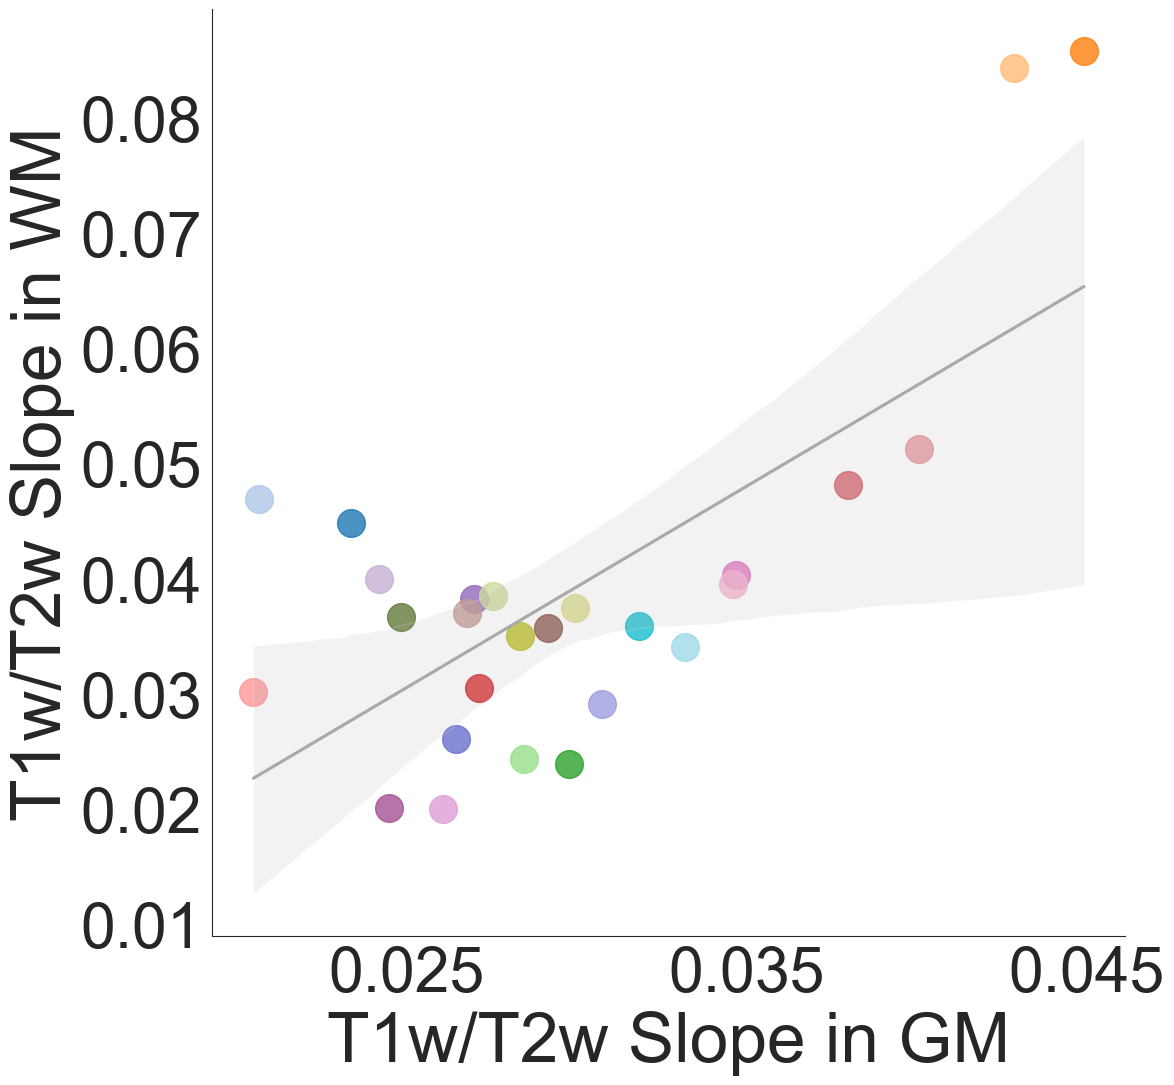

In [9]:
sns.set_style('white');
fig1=sns.lmplot(
    data=SlopeBoth, x='coeff_GM', y="coeff", hue="tractID", height=10, scatter_kws={"s": 400}, fit_reg=False, legend=False, palette=color_list_chosen
)
fig1=sns.regplot(data=SlopeBoth, x='coeff_GM', y="coeff", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "darkgrey"})
scipy.stats.pearsonr(SlopeBoth['coeff_GM'], SlopeBoth['coeff'])
#fig1.legend(title='Tract', fontsize='15', title_fontsize='20', bbox_to_anchor=(0.7, 0.25, 0.5, 0.5), loc='right', borderaxespad=0, frameon=FcMilse)
plt.xlabel("T1w/T2w Slope in GM", fontsize=50)
plt.ylabel("T1w/T2w Slope in WM", fontsize=50)
plt.xticks([0.025, 0.035, 0.045], fontsize=45)
plt.yticks(fontsize=45)

plt.savefig('./figures/T1wT2w_SlopeGMvsSlopeWM.png', dpi=600, bbox_inches = "tight")

In [10]:
# Define bundles
b=['AFL', 'AFR', 'ATRL', 'ATRR', 'CCL', 'CCR', 'CSL', 'CSR', 'FcMi', 'FcMa', 'IFOFL', 'IFOFR', 'ILFL', 'ILFR', 'MLFL', 'MLFR', 'ORL', 'ORR', 'SLFL', 'SLFR', 'UNCL', 'UNCR', 'VOFL', 'VOFR', 'pAFL', 'pAFR']

results = []

for bundle in b:
    bundle_df = slope_analyses_mean[slope_analyses_mean['tractID'] == bundle]

    if len(bundle_df) >= 2:
        # White matter
        r_wm, p_wm = stats.pearsonr(bundle_df['scan_age'], bundle_df['t1wt2w'])
        # Gray matter
        r_gm, p_gm = stats.pearsonr(bundle_df['scan_age'], bundle_df['WeAvGMT1wT2w'])

        results.append({
            'Tract': bundle,
            'r_WM': r_wm,
            'p_WM': p_wm,
            'r2_WM': r_wm**2,
            'r_GM': r_gm,
            'p_GM': p_gm,
            'r2_GM': r_gm**2
        })

# Convert to DataFrame
df_tract_corrs = pd.DataFrame(results)

# View or export
df_tract_corrs
df_tract_corrs.to_csv('./outputData/tract_r2_pvalues_wm_gm_bothemis.csv', index=False)

r2_min_wm = df_tract_corrs['r2_WM'].min()
r2_min_gm = df_tract_corrs['r2_GM'].min()
p_max_wm = df_tract_corrs['p_WM'].max()
p_max_gm = df_tract_corrs['p_GM'].max()

print(f"Min r² WM: {r2_min_wm}")
print(f"Min r² GM: {r2_min_gm}")
print(f"Max p WM: {p_max_wm}")
print(f"Max p GM: {p_max_gm}")

,Tract,r_WM,p_WM,r2_WM,r_GM,p_GM,r2_GM
0,AFL,0.704281,3.263892e-42,0.496011,0.802477,1.014542e-62,0.643969
1,AFR,0.702727,5.880208e-42,0.493825,0.775426,4.833601e-56,0.601285
2,ATRL,0.814681,4.402896e-66,0.663706,0.679934,2.177024e-38,0.462310
3,ATRR,0.817392,7.294052e-67,0.668130,0.615372,7.715669e-30,0.378682
4,CCL,0.689430,7.785960e-40,0.475313,0.796887,2.943360e-61,0.635028
5,CCR,0.633142,5.437574e-32,0.400869,0.728045,2.423817e-46,0.530050
6,CSL,0.877853,1.244210e-88,0.770626,0.841637,1.768445e-74,0.708352
7,CSR,0.867127,5.202851e-84,0.751909,0.818864,2.714750e-67,0.670538
8,FcMi,0.737057,5.037374e-48,0.543254,0.623813,7.626529e-31,0.389143
9,FcMa,0.776149,3.295417e-56,0.602408,0.664763,3.457671e-36,0.441910


Min r² WM: 0.4008690495300918
Min r² GM: 0.37868210265381014
Max p WM: 5.437574054622242e-32
Max p GM: 7.715669237087721e-30


<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'AF')

Text(0.5, 0, 'Scan Age')

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'ATR')

Text(0.5, 0, 'Scan Age')

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'CC')

Text(0.5, 0, 'Scan Age')

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'CS')

Text(0.5, 0, 'Scan Age')

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'IFOF')

Text(0.5, 0, 'Scan Age')

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'ILF')

Text(0.5, 0, 'Scan Age')

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'MLF')

Text(0.5, 0, 'Scan Age')

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'OR')

Text(0.5, 0, 'Scan Age')

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'SLF')

Text(0.5, 0, 'Scan Age')

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'UNC')

Text(0.5, 0, 'Scan Age')

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'VOF')

Text(0.5, 0, 'Scan Age')

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'pAF')

Text(0.5, 0, 'Scan Age')

<Axes: >

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'FcMi')

Text(0.5, 0, 'Scan Age')

<Axes: >

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'FcMa')

Text(0.5, 0, 'Scan Age')

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

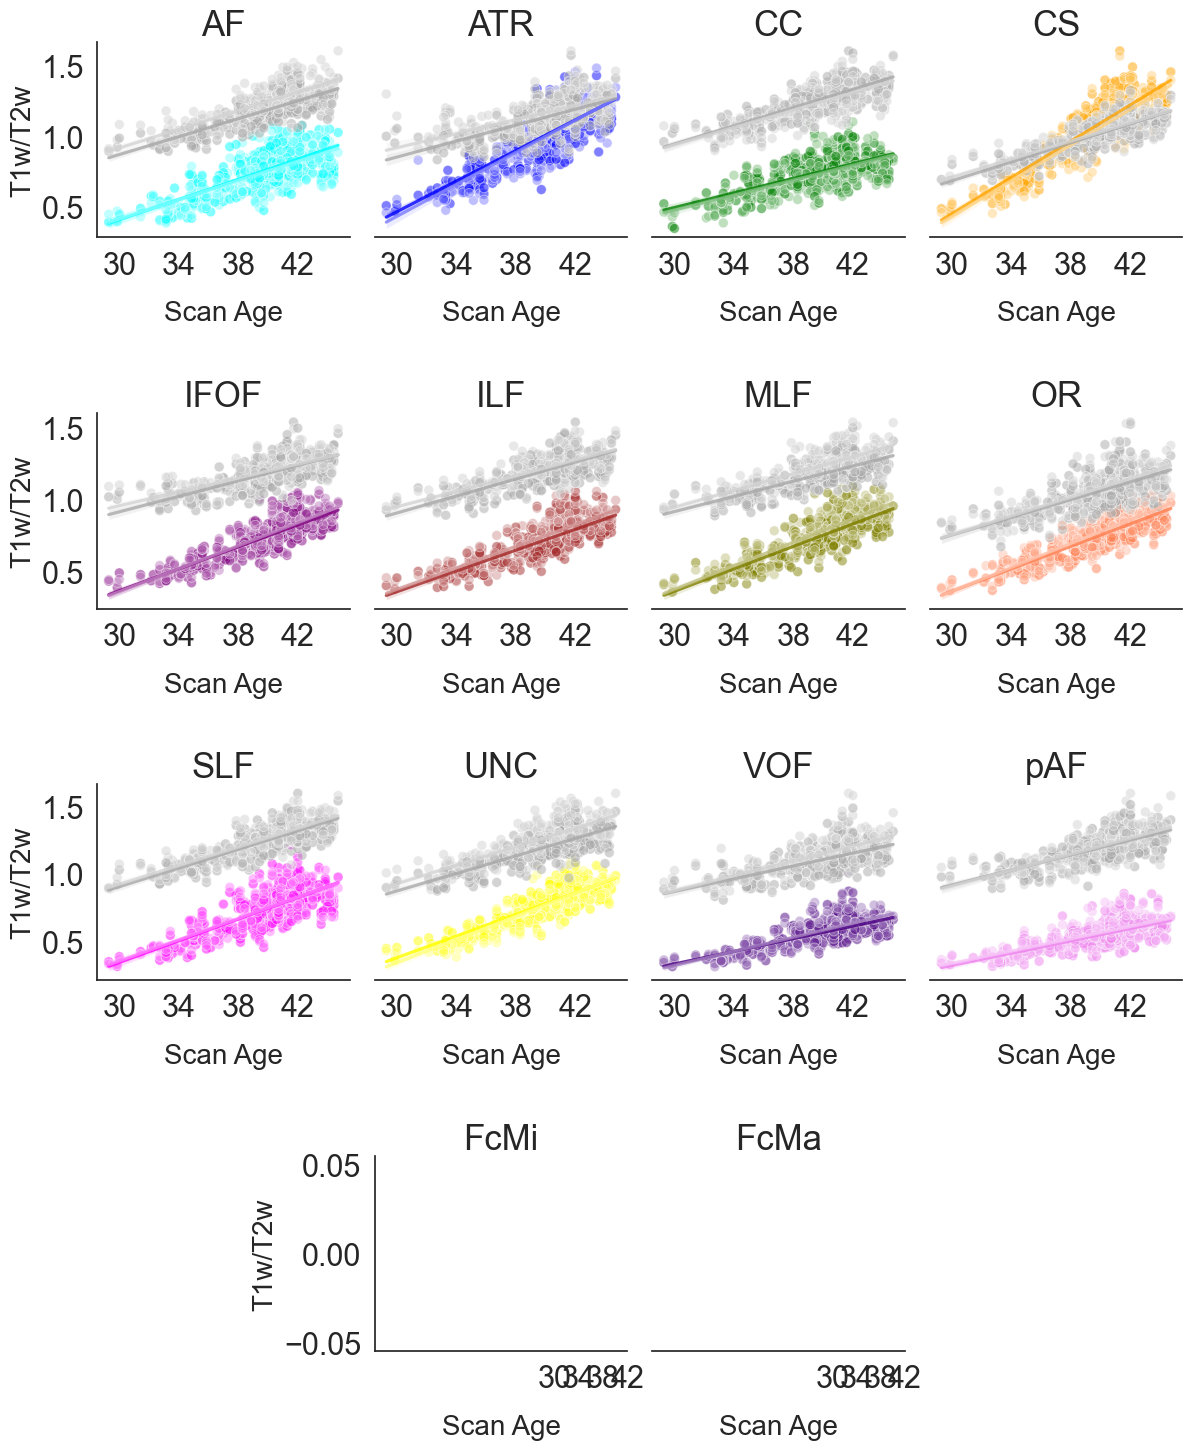

In [11]:
# --- PREPARE DATA -------------------------------------------------------------
df = slope_analyses_mean.copy()

# Extract Hemisphere from tract names (e.g. "AF_L" → "L")
df["Hemisphere"] = df["tractID"].str.extract(r'(L|R)$')

# Extract base bundle name (e.g. "AF_L" → "AF")
df["BundleBase"] = df["tractID"].str.replace(r'(L|R)$', '', regex=True)

# --- DEFINE LAYOUT AND STYLE --------------------------------------------------
tractPosHorz = {
    'AF': (0,0), 'ATR': (0,1), 'CC': (0,2), 'CS': (0,3),
    'IFOF':(1,0), 'ILF':(1,1), 'MLF':(1,2), 'OR':(1,3),
    'SLF':(2,0), 'UNC':(2,1), 'VOF':(2,2), 'pAF':(2,3),
    'FcMi':(3,1), 'FcMa':(3,2)
}

tracts = ['AF', 'ATR', 'CC', 'CS', 'IFOF', 'ILF', 'MLF',
           'OR', 'SLF', 'UNC', 'VOF', 'pAF', 'FcMi', 'FcMa']

colors = ['cyan', 'blue', 'green', 'orange', 'purple', 'brown', 'olive',
           'coral', 'fuchsia', 'yellow', 'indigo', 'violet', 'salmon', 'red']

sns.set(font_scale=2)
sns.set_style("white")

fig, axes = plt.subplots(4, 4, figsize=(14,17), frameon=False)
fig.subplots_adjust(wspace=0.1, hspace=0.9)

import matplotlib.colors as mcolors

def lighten_color(color, amount=0.5):
    """
    Lightens the given color by blending it with white.
    amount=0 → white, amount=1 → original color.
    """
    try:
        c = mcolors.cnames[color]
    except KeyError:
        c = color
    rgb = mcolors.to_rgb(c)
    return tuple(1 - (1 - x) * amount for x in rgb)

# --- MAIN LOOP ---------------------------------------------------------------
for ct, (bundle, color) in enumerate(zip(tracts, colors)):
    if bundle not in tractPosHorz:
        continue

    ax = axes[tractPosHorz[bundle]]

    # Filter data for the base bundle (both hemispheres)
    SlopeTract = df.query("BundleBase == @bundle")

    # Aggregate per subject, hemisphere, etc.
    SlopeTractGM = SlopeTract.groupby(
        ['subjectID', 'scan_age', 'BundleBase', 'Hemisphere'],
        as_index=False, sort=False
    )['WeAvGMT1wT2w'].mean()

    SlopeTractWM = SlopeTract.groupby(
        ['subjectID', 'scan_age', 'BundleBase', 'Hemisphere'],
        as_index=False, sort=False
    )['t1wt2w'].mean()

    # Make a lighter version of the current tract color for the right hemisphere
    light_color = lighten_color(color, amount=0.5)

    # Plot white matter (same hue, lighter for R)
    sns.scatterplot(
        data=SlopeTractWM, x='scan_age', y='t1wt2w', hue='Hemisphere', style='Hemisphere',
        markers={'L': 'o', 'R': 'o'}, s=50,
        palette={'L': color, 'R': light_color}, ax=ax,
        alpha=0.5, legend=False
    )

    # Regression lines per hemisphere
    for hemi, line_color in zip(['L', 'R'], [color, light_color]):
        sns.regplot(
            data=SlopeTractWM[SlopeTractWM['Hemisphere'] == hemi],
            x='scan_age', y='t1wt2w', scatter=False, ax=ax,
            line_kws={'color': line_color, 'alpha': 0.8}
        )

    # Plot gray matter (with slightly lighter colors)
    sns.scatterplot(
        data=SlopeTractGM, x='scan_age', y='WeAvGMT1wT2w', hue='Hemisphere', style='Hemisphere',
        markers={'L': 'o', 'R': 'o'}, s=50,
        palette={'L': 'darkgray', 'R': 'lightgray'}, ax=ax,
        alpha=0.5, legend=False
    )

    for hemi, line_color in zip(['L', 'R'], ['darkgray', 'lightgray']):
        sns.regplot(
            data=SlopeTractGM[SlopeTractGM['Hemisphere'] == hemi],
            x='scan_age', y='WeAvGMT1wT2w', scatter=False, ax=ax,
            line_kws={'color': line_color, 'alpha': 0.8}
        )

    # --- Titles & labels
    ax.set_title(bundle, pad=5, fontsize=25)
    ax.set_xlabel('Scan Age', labelpad=15, fontsize=20)

    if ct in [0, 4, 8, 12]:  # first column
        _=ax.set_ylabel("T1w/T2w",fontsize=20);
        _=ax.set_xticks([30, 34, 38, 42]);
        #_=ax.set_xticklabels(fontsize=20);
        #_=ax.set_yticks([0.4, 0.45, 0.5]);
        #_=ax.set_yticklabels(fontsize=20)
        _=ax.spines['right'].set_visible(False);
        _=ax.spines['top'].set_visible(False);
        _=line1=Line2D([],[],color=color_list_all[ct],linestyle='dashed');
        _=line2=Line2D([],[],color=color_list_all[ct],linestyle='-');

    else:
        _=ax.set_ylabel('T1w/T2w', fontsize=14);
        _=ax.set_xticks([30, 34, 38, 42]);
        #_=ax.set_xticklabels(fontsize=20);
        #_=ax.set_yticks([0.4, 0.45, 0.5]);
        _=ax.yaxis.set_visible(False);
        _=ax.spines['right'].set_visible(False);
        _=ax.spines['left'].set_visible(False);
        _=ax.spines['top'].set_visible(False);

    # Clean frame
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Turn off unused axes
axes[3,3].axis("off")
axes[3,0].axis("off")

# --- SAVE & SHOW -------------------------------------------------------------
fig.savefig('./figures/scanage_per_bundle_bothhemis.png', dpi=600)
plt.show()

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'AF')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'T1w/T2w')

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'ATR')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'T1w/T2w')

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'CC')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'T1w/T2w')

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'CS')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'T1w/T2w')

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'IFOF')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'T1w/T2w')

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'ILF')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'T1w/T2w')

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'MLF')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'T1w/T2w')

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'OR')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'T1w/T2w')

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'SLF')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'T1w/T2w')

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'UNC')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'T1w/T2w')

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'VOF')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'T1w/T2w')

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'pAF')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'T1w/T2w')

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'FcMi')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'T1w/T2w')

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='t1wt2w'>

<Axes: xlabel='scan_age', ylabel='WeAvGMT1wT2w'>

Text(0.5, 1.0, 'FcMa')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'T1w/T2w')

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

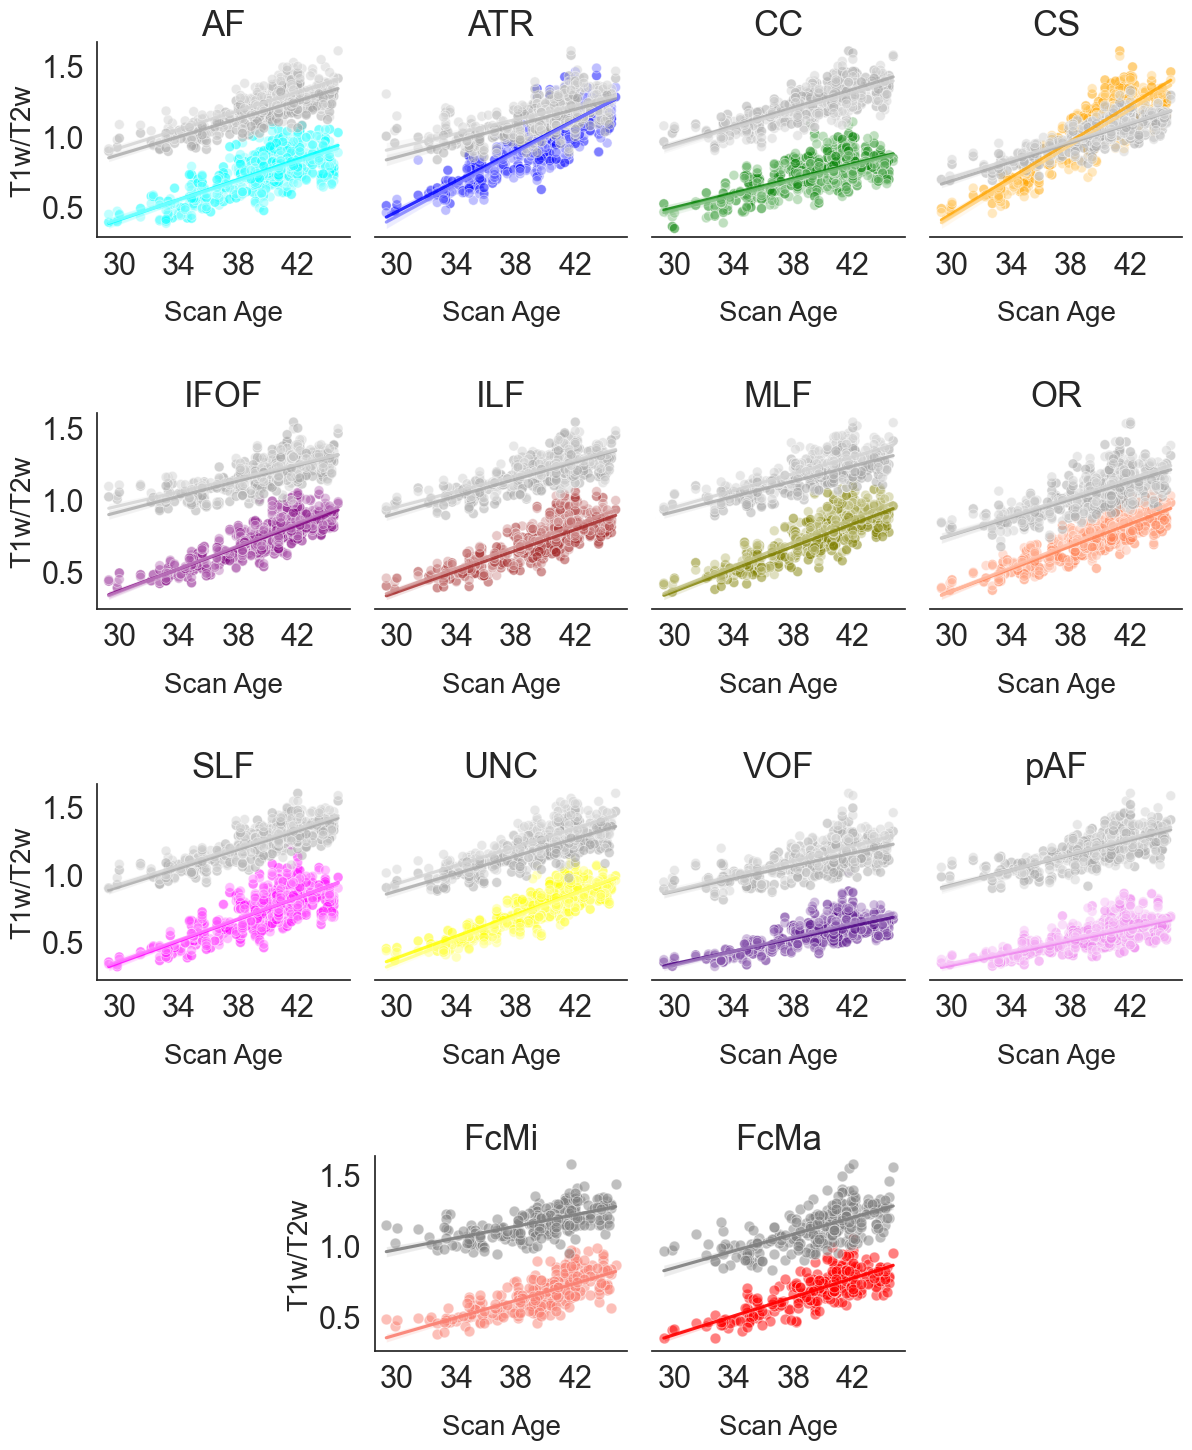

In [12]:
# --- PREPARE DATA -------------------------------------------------------------
df = slope_analyses_mean.copy()

# 1) Extract Hemisphere (only if tract ends with L or R)
df["Hemisphere"] = df["tractID"].str.extract(r'(L|R)$')

# 2) Extract BundleBase safely
df["BundleBase"] = df["tractID"]           # start with full name
mask = df["tractID"].str.endswith(("L", "R"))  # true hemisphere bundles
df.loc[mask, "BundleBase"] = df.loc[mask, "tractID"].str.replace(r"(L|R)$", "", regex=True)

# For FcMi & FcMa → both-hemisphere bundles → assign pseudo-hemi
df.loc[df["BundleBase"].isin(["FcMi", "FcMa"]), "Hemisphere"] = "B"


# --- DEFINE LAYOUT AND STYLE --------------------------------------------------
tractPosHorz = {
    'AF': (0,0), 'ATR': (0,1), 'CC': (0,2), 'CS': (0,3),
    'IFOF': (1,0), 'ILF': (1,1), 'MLF': (1,2), 'OR': (1,3),
    'SLF': (2,0), 'UNC': (2,1), 'VOF': (2,2), 'pAF': (2,3),
    'FcMi': (3,1), 'FcMa': (3,2)
}

tracts = ['AF', 'ATR', 'CC', 'CS', 'IFOF', 'ILF', 'MLF',
          'OR', 'SLF', 'UNC', 'VOF', 'pAF', 'FcMi', 'FcMa']

colors = ['cyan', 'blue', 'green', 'orange', 'purple', 'brown', 'olive',
          'coral', 'fuchsia', 'yellow', 'indigo', 'violet', 'salmon', 'red']

sns.set(font_scale=2)
sns.set_style("white")

fig, axes = plt.subplots(4, 4, figsize=(14,17), frameon=False)
fig.subplots_adjust(wspace=0.1, hspace=0.9)

import matplotlib.colors as mcolors

def lighten_color(color, amount=0.5):
    try:
        c = mcolors.cnames[color]
    except KeyError:
        c = color
    rgb = mcolors.to_rgb(c)
    return tuple(1 - (1 - x) * amount for x in rgb)


# --- MAIN LOOP ---------------------------------------------------------------
for ct, (bundle, color) in enumerate(zip(tracts, colors)):
    if bundle not in tractPosHorz:
        continue

    ax = axes[tractPosHorz[bundle]]

    # Filter data for the base bundle (both hemispheres)
    SlopeTract = df.query("BundleBase == @bundle")

    # Aggregate per subject & hemisphere
    SlopeTractGM = SlopeTract.groupby(
        ['subjectID', 'scan_age', 'BundleBase', 'Hemisphere'],
        as_index=False, sort=False
    )['WeAvGMT1wT2w'].mean()

    SlopeTractWM = SlopeTract.groupby(
        ['subjectID', 'scan_age', 'BundleBase', 'Hemisphere'],
        as_index=False, sort=False
    )['t1wt2w'].mean()

    # Special case: FcMi & FcMa (ONLY ONE "hemisphere")
    if bundle in ["FcMi", "FcMa"]:
        sns.scatterplot(
            data=SlopeTractWM, x='scan_age', y='t1wt2w',
            color=color, s=60, alpha=0.5, ax=ax
        )
        sns.regplot(
            data=SlopeTractWM,
            x='scan_age', y='t1wt2w', scatter=False, ax=ax,
            line_kws={'color': color, 'alpha': 0.9}
        )

        sns.scatterplot(
            data=SlopeTractGM, x='scan_age', y='WeAvGMT1wT2w',
            color='gray', s=60, alpha=0.5, ax=ax
        )
        sns.regplot(
            data=SlopeTractGM,
            x='scan_age', y='WeAvGMT1wT2w', scatter=False, ax=ax,
            line_kws={'color': 'gray', 'alpha': 0.9}
        )

    else:
        # Normal L/R hemisphere bundles --------------------------------------
        light_color = lighten_color(color, amount=0.5)

        # WM scatter
        sns.scatterplot(
            data=SlopeTractWM, x='scan_age', y='t1wt2w',
            hue='Hemisphere', style='Hemisphere',
            markers={'L': 'o', 'R': 'o'}, s=50,
            palette={'L': color, 'R': light_color}, ax=ax,
            alpha=0.5, legend=False
        )

        # WM regression lines
        for hemi, line_color in zip(['L', 'R'], [color, light_color]):
            sns.regplot(
                data=SlopeTractWM[SlopeTractWM['Hemisphere'] == hemi],
                x='scan_age', y='t1wt2w', scatter=False, ax=ax,
                line_kws={'color': line_color, 'alpha': 0.8}
            )

        # GM scatter
        sns.scatterplot(
            data=SlopeTractGM, x='scan_age', y='WeAvGMT1wT2w',
            hue='Hemisphere', style='Hemisphere',
            markers={'L': 'o', 'R': 'o'}, s=50,
            palette={'L': 'darkgray', 'R': 'lightgray'}, ax=ax,
            alpha=0.5, legend=False
        )

        # GM regression
        for hemi, line_color in zip(['L', 'R'], ['darkgray', 'lightgray']):
            sns.regplot(
                data=SlopeTractGM[SlopeTractGM['Hemisphere'] == hemi],
                x='scan_age', y='WeAvGMT1wT2w', scatter=False, ax=ax,
                line_kws={'color': line_color, 'alpha': 0.8}
            )


    # --- Titles & labels -----------------------------------------------------
    ax.set_title(bundle, pad=5, fontsize=25)
    ax.set_xlabel('Scan Age', labelpad=15, fontsize=20)

    if ct in [0, 4, 8, 12]:  # first column
        ax.set_ylabel("T1w/T2w", fontsize=20)
        ax.set_xticks([30, 34, 38, 42])
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

    else:
        ax.set_ylabel('T1w/T2w', fontsize=14)
        ax.set_xticks([30, 34, 38, 42])
        ax.yaxis.set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


# Turn off unused axes
axes[3,3].axis("off")
axes[3,0].axis("off")

# --- SAVE & SHOW -------------------------------------------------------------
fig.savefig('./figures/scanage_per_bundle_bothhemis.png', dpi=600)
plt.show()

## R1

In [13]:
#Compute slope for scan age for R1 of white matter

tractCount=SlopeDataframe['tractID'].unique()

coeff=[] #Creating arrays
se = []
coeffType=[]
tractTrack1=[]
intercept=[]
r2 = []
adjustR2 = []
aic = []
pvals=[]

for tract in tractCount:

    dfForStats=SlopeDataframe[(SlopeDataframe['tractID']==tract)]
    dfForStats.reset_index(level=0, inplace=True)

    scanAgeArray=np.array(dfForStats['age'])
    scanAgeArray=scanAgeArray.reshape(1,-1)
    scanAgeNorm=preprocessing.normalize(scanAgeArray,axis=1)
    scanAgeNorm=scanAgeNorm.reshape(-1)
    dfForStats["scanAgeNorm"]=scanAgeNorm

    R1Array=np.array(dfForStats['R1'])
    R1Array=R1Array.reshape(1,-1)
    R1Norm=preprocessing.normalize(R1Array,axis=1)
    R1Norm=R1Norm.reshape(-1)
    dfForStats["R1Norm"]=R1Norm

    df = dfForStats
    md = smf.ols(formula="R1~ 1 + age", data=df) #Predicting dti_mdNorm through the other variables
    mdf = md.fit() # Actually commanding the linear analysis, it could be any other analysis method
    results=mdf.summary()

    # Note that tables is a list. The table at index 1 is the "core" table. Additionally, read_html puts dfs in a list, so we want index 0
    results_as_html = results.tables[1].as_html()
    LM_results=pd.read_html(results_as_html, header=0, index_col=0)[0]

    results_as_html_R2 = results.tables[0].as_html()
    LM_results_R2=pd.read_html(results_as_html_R2, index_col=0)[0]

    results_R2s=LM_results_R2[3]
    #LM_results.head()
    #LM_results_R2.head()
    #results_R2s.head()

    SE=LM_results['std err']

    inter=mdf.params['Intercept']
    intercept.append(inter)

    #SE.head()
    se.append(SE["age"])
    coeff.append(mdf.params['age'])
    coeff_type=3
    tractTrack1.append(tract)
    #nodeTrack1.append(node)
    coeffType.append(coeff_type) #Add another line below
    r2.append(results_R2s['Dep. Variable:'])
    adjustR2.append(results_R2s['Model:'])
    aic.append(results_R2s['No. Observations:'])
    pvals.append(results_R2s['Date:'])

print(mdf.summary())
df=pd.DataFrame(tractTrack1)
df.columns=['tractID']
df.insert(1,"coeffType",coeffType)
df.insert(2,"coeff",coeff)
df.insert(3,"se",se)
df.insert(4,"intercept",intercept)
df.insert(5,"r2",r2)
df.insert(6,"adjustR2",adjustR2)
df.insert(7,"aic",aic)
df.insert(8,"pvals",pvals)

os.makedirs('./outputData',exist_ok=True)
df.to_csv('./outputData/LM_result_scanAge_noNorm_WM_AverageSubj_R1.csv')
df.head()
df.min(axis=0, numeric_only=True)
df.max(axis=0, numeric_only=True)
df.mean(axis=0, numeric_only=True)
dfScanAge=df
df.head()

statsPerBundle=df.groupby('tractID').mean()
statsPerBundle.head()
statsPerBundle.to_csv('./outputData/LM_result_scanAge_noNorm_meanPerBundle_WM_AverageSubj_R1.csv')

                            OLS Regression Results                            
Dep. Variable:                     R1   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     8.247
Date:                Fri, 21 Nov 2025   Prob (F-statistic):            0.00976
Time:                        11:27:19   Log-Likelihood:                 56.388
No. Observations:                  21   AIC:                            -108.8
Df Residuals:                      19   BIC:                            -106.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2320      0.067      3.485      0.0

,tractID,coeffType,coeff,se,intercept,r2,adjustR2,aic,pvals
0,AFL,3,0.004666,0.002,0.241405,0.247,0.207,-100.4,0.022
1,AFR,3,0.003839,0.002,0.277820,0.202,0.160,-103.1,0.041
2,ATRL,3,-0.000097,0.001,0.508503,0.000,-0.052,-113.7,0.944
3,ATRR,3,0.001376,0.001,0.444359,0.056,0.006,-115.7,0.303
4,CCL,3,0.003160,0.002,0.288426,0.119,0.073,-98.2,0.125


coeffType      3.000000
coeff         -0.000097
se             0.001000
intercept      0.164568
r2             0.000000
adjustR2      -0.052000
aic         -127.600000
pvals          0.000116
dtype: float64

coeffType     3.000000
coeff         0.006874
se            0.002000
intercept     0.508503
r2            0.551000
adjustR2      0.528000
aic         -98.200000
pvals         0.944000
dtype: float64

coeffType      3.000000
coeff          0.003874
se             0.001462
intercept      0.289667
r2             0.275808
adjustR2       0.237615
aic         -111.028846
pvals          0.098066
dtype: float64

,tractID,coeffType,coeff,se,intercept,r2,adjustR2,aic,pvals
0,AFL,3,0.004666,0.002,0.241405,0.247,0.207,-100.4,0.022
1,AFR,3,0.003839,0.002,0.277820,0.202,0.160,-103.1,0.041
2,ATRL,3,-0.000097,0.001,0.508503,0.000,-0.052,-113.7,0.944
3,ATRR,3,0.001376,0.001,0.444359,0.056,0.006,-115.7,0.303
4,CCL,3,0.003160,0.002,0.288426,0.119,0.073,-98.2,0.125


,coeffType,coeff,se,intercept,r2,adjustR2,aic,pvals
tractID,,,,,,,,
AFL,3.0,0.004666,0.002,0.241405,0.247,0.207,-100.4,0.022
AFR,3.0,0.003839,0.002,0.277820,0.202,0.160,-103.1,0.041
ATRL,3.0,-0.000097,0.001,0.508503,0.000,-0.052,-113.7,0.944
ATRR,3.0,0.001376,0.001,0.444359,0.056,0.006,-115.7,0.303
CCL,3.0,0.003160,0.002,0.288426,0.119,0.073,-98.2,0.125


In [14]:
#Compute slope for scan age for R1 of gray matter

tractCount=SlopeDataframe['tractID'].unique()

coeff=[] #Creating arrays
se = []
coeffType=[]
tractTrack1=[]
intercept=[]
r2 = []
adjustR2 = []
aic = []
pvals=[]

for tract in tractCount:

    dfForStats=SlopeDataframe[(SlopeDataframe['tractID']==tract)]
    dfForStats.reset_index(level=0, inplace=True)

    scanAgeArray=np.array(dfForStats['age'])
    scanAgeArray=scanAgeArray.reshape(1,-1)
    scanAgeNorm=preprocessing.normalize(scanAgeArray,axis=1)
    scanAgeNorm=scanAgeNorm.reshape(-1)
    dfForStats["scanAgeNorm"]=scanAgeNorm

    R1Array=np.array(dfForStats['GM_R1'])
    R1Array=R1Array.reshape(1,-1)
    R1Norm=preprocessing.normalize(R1Array,axis=1)
    R1Norm=R1Norm.reshape(-1)
    dfForStats["R1Norm"]=R1Norm

    df = dfForStats
    md = smf.ols(formula="GM_R1~ 1 + age", data=df) #Predicting dti_mdNorm through the other variables
    mdf = md.fit() # Actually commanding the linear analysis, it could be any other analysis method
    results=mdf.summary()

    # Note that tables is a list. The table at index 1 is the "core" table. Additionally, read_html puts dfs in a list, so we want index 0
    results_as_html = results.tables[1].as_html()
    LM_results=pd.read_html(results_as_html, header=0, index_col=0)[0]

    results_as_html_R2 = results.tables[0].as_html()
    LM_results_R2=pd.read_html(results_as_html_R2, index_col=0)[0]

    results_R2s=LM_results_R2[3]
    #LM_results.head()
    #LM_results_R2.head()
    #results_R2s.head()

    SE=LM_results['std err']

    inter=mdf.params['Intercept']
    intercept.append(inter)

    #SE.head()
    se.append(SE["age"])
    coeff.append(mdf.params['age'])
    coeff_type=3
    tractTrack1.append(tract)
    #nodeTrack1.append(node)
    coeffType.append(coeff_type) #Add another line below
    r2.append(results_R2s['Dep. Variable:'])
    adjustR2.append(results_R2s['Model:'])
    aic.append(results_R2s['No. Observations:'])
    pvals.append(results_R2s['Date:'])

print(mdf.summary())
df=pd.DataFrame(tractTrack1)
df.columns=['tractID']
df.insert(1,"coeffType",coeffType)
df.insert(2,"coeff_GM",coeff)
df.insert(3,"se",se)
df.insert(4,"intercept",intercept)
df.insert(5,"r2",r2)
df.insert(6,"adjustR2",adjustR2)
df.insert(7,"aic",aic)
df.insert(8,"pvals",pvals)

os.makedirs('./outputData',exist_ok=True)
df.to_csv('./outputData/LM_result_scanAge_noNorm_GM_AverageSubj_R1.csv')
df.head()
df.min(axis=0, numeric_only=True)
df.max(axis=0, numeric_only=True)
df.mean(axis=0, numeric_only=True)
dfScanAge=df
df.head()

statsPerBundle=df.groupby('tractID').mean()
statsPerBundle.head()
statsPerBundle.to_csv('./outputData/LM_result_scanAge_noNorm_meanPerBundle_GM_AverageSubj_R1.csv')

                            OLS Regression Results                            
Dep. Variable:                  GM_R1   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     8.731
Date:                Fri, 21 Nov 2025   Prob (F-statistic):            0.00814
Time:                        11:27:19   Log-Likelihood:                 64.860
No. Observations:                  21   AIC:                            -125.7
Df Residuals:                      19   BIC:                            -123.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3210      0.044      7.220      0.0

,tractID,coeffType,coeff_GM,se,intercept,r2,adjustR2,aic,pvals
0,AFL,3,0.002854,0.001,0.326769,0.330,0.294,-129.6,0.00649
1,AFR,3,0.002958,0.001,0.321279,0.306,0.269,-125.7,0.00935
2,ATRL,3,0.001096,0.001,0.403899,0.043,-0.008,-119.4,0.36800
3,ATRR,3,0.001548,0.001,0.383056,0.082,0.033,-119.3,0.20900
4,CCL,3,0.002528,0.001,0.343369,0.258,0.218,-127.3,0.01890


coeffType      3.000000
coeff_GM       0.001096
se             0.001000
intercept      0.225711
r2             0.043000
adjustR2      -0.008000
aic         -132.400000
pvals          0.000531
dtype: float64

coeffType      3.000000
coeff_GM       0.005255
se             0.002000
intercept      0.403899
r2             0.477000
adjustR2       0.449000
aic         -101.200000
pvals          0.368000
dtype: float64

coeffType      3.000000
coeff_GM       0.003032
se             0.001077
intercept      0.325526
r2             0.281885
adjustR2       0.243923
aic         -121.661538
pvals          0.051853
dtype: float64

,tractID,coeffType,coeff_GM,se,intercept,r2,adjustR2,aic,pvals
0,AFL,3,0.002854,0.001,0.326769,0.330,0.294,-129.6,0.00649
1,AFR,3,0.002958,0.001,0.321279,0.306,0.269,-125.7,0.00935
2,ATRL,3,0.001096,0.001,0.403899,0.043,-0.008,-119.4,0.36800
3,ATRR,3,0.001548,0.001,0.383056,0.082,0.033,-119.3,0.20900
4,CCL,3,0.002528,0.001,0.343369,0.258,0.218,-127.3,0.01890


,coeffType,coeff_GM,se,intercept,r2,adjustR2,aic,pvals
tractID,,,,,,,,
AFL,3.0,0.002854,0.001,0.326769,0.330,0.294,-129.6,0.00649
AFR,3.0,0.002958,0.001,0.321279,0.306,0.269,-125.7,0.00935
ATRL,3.0,0.001096,0.001,0.403899,0.043,-0.008,-119.4,0.36800
ATRR,3.0,0.001548,0.001,0.383056,0.082,0.033,-119.3,0.20900
CCL,3.0,0.002528,0.001,0.343369,0.258,0.218,-127.3,0.01890


In [15]:
SlopeWM_R1 = pd.read_csv('./outputData/LM_result_scanAge_noNorm_WM_AverageSubj_R1.csv',  index_col=0)
SlopeGM_R1 = pd.read_csv('./outputData/LM_result_scanAge_noNorm_GM_AverageSubj_R1.csv',  index_col=0)

SlopeBothR1 = pd.merge(SlopeWM_R1, SlopeGM_R1[['tractID', 'coeff_GM', 'r2', 'aic']], on='tractID')
SlopeBothR1

SlopeBothR1=SlopeBothR1.set_index(['tractID']).reindex(['AFL', 'AFR', 'ATRL', 'ATRR', 'CCL', 'CCR', 'CSL', 'CSR', 'FcMi', 'FcMa', 'IFOFL', 'IFOFR', 'ILFL', 'ILFR', 'MLFL', 'MLFR', 'ORL', 'ORR', 'SLFL', 'SLFR', 'UNCL', 'UNCR', 'VOFL', 'VOFR', 'pAFL', 'pAFR']).reset_index()
SlopeBothR1

,tractID,coeffType,coeff,se,intercept,r2_x,adjustR2,aic_x,pvals,coeff_GM,r2_y,aic_y
0,AFL,3,0.004666,0.002,0.241405,0.247,0.207,-100.40,0.022000,0.002854,0.330,-129.6
1,AFR,3,0.003839,0.002,0.277820,0.202,0.160,-103.10,0.041000,0.002958,0.306,-125.7
2,ATRL,3,-0.000097,0.001,0.508503,0.000,-0.052,-113.70,0.944000,0.001096,0.043,-119.4
3,ATRR,3,0.001376,0.001,0.444359,0.056,0.006,-115.70,0.303000,0.001548,0.082,-119.3
4,CCL,3,0.003160,0.002,0.288426,0.119,0.073,-98.20,0.125000,0.002528,0.258,-127.3
5,CCR,3,0.000813,0.001,0.399234,0.020,-0.032,-115.00,0.546000,0.002529,0.273,-129.0
6,CSL,3,0.005418,0.002,0.315464,0.369,0.336,-106.30,0.003490,0.003725,0.415,-126.1
7,CSR,3,0.005612,0.001,0.307987,0.470,0.442,-113.50,0.000602,0.003672,0.385,-124.0
8,FcMa,3,0.003076,0.002,0.305750,0.134,0.088,-102.10,0.103000,0.005255,0.411,-111.3
9,FcMi,3,0.002188,0.002,0.314186,0.072,0.023,-101.80,0.241000,0.001355,0.068,-120.6


,tractID,coeffType,coeff,se,intercept,r2_x,adjustR2,aic_x,pvals,coeff_GM,r2_y,aic_y
0,AFL,3,0.004666,0.002,0.241405,0.247,0.207,-100.40,0.022000,0.002854,0.330,-129.6
1,AFR,3,0.003839,0.002,0.277820,0.202,0.160,-103.10,0.041000,0.002958,0.306,-125.7
2,ATRL,3,-0.000097,0.001,0.508503,0.000,-0.052,-113.70,0.944000,0.001096,0.043,-119.4
3,ATRR,3,0.001376,0.001,0.444359,0.056,0.006,-115.70,0.303000,0.001548,0.082,-119.3
4,CCL,3,0.003160,0.002,0.288426,0.119,0.073,-98.20,0.125000,0.002528,0.258,-127.3
5,CCR,3,0.000813,0.001,0.399234,0.020,-0.032,-115.00,0.546000,0.002529,0.273,-129.0
6,CSL,3,0.005418,0.002,0.315464,0.369,0.336,-106.30,0.003490,0.003725,0.415,-126.1
7,CSR,3,0.005612,0.001,0.307987,0.470,0.442,-113.50,0.000602,0.003672,0.385,-124.0
8,FcMi,3,0.002188,0.002,0.314186,0.072,0.023,-101.80,0.241000,0.001355,0.068,-120.6
9,FcMa,3,0.003076,0.002,0.305750,0.134,0.088,-102.10,0.103000,0.005255,0.411,-111.3


In [16]:
# Paired t-test between white matter and gray matter coefficients
t_stat, p_val = stats.ttest_rel(SlopeBothR1['coeff'], SlopeBothR1['coeff_GM'])
print(f"CoeffWM vs. CoeffGM t = {t_stat:.4f}, p = {p_val:.4f}")

# Print mean values
mean_wm = SlopeBothR1['coeff'].mean()
mean_gm = SlopeBothR1['coeff_GM'].mean()
print(f"Mean Coeff WM: {mean_wm:.4f}")
print(f"Mean Coeff GM: {mean_gm:.4f}")

# Calculate difference metrics y=GM, x=WM
SlopeBothR1['diff_r2'] = SlopeBothR1['r2_x'] - SlopeBothR1['r2_y']
SlopeBothR1['diff_aic'] = SlopeBothR1['aic_x'] - SlopeBothR1['aic_y']

# Print mean differences
mean_diff_r2 = SlopeBothR1['diff_r2'].mean()
mean_diff_aic = SlopeBothR1['diff_aic'].mean()
print(f"Mean Δr²: {mean_diff_r2:.4f}")
print(f"Mean ΔAIC: {mean_diff_aic:.4f}")

CoeffWM vs. CoeffGM t = 3.4143, p = 0.0022
Mean Coeff WM: 0.0039
Mean Coeff GM: 0.0030
Mean Δr²: -0.0061
Mean ΔAIC: 10.6327


PearsonRResult(statistic=np.float64(0.6740253020207044), pvalue=np.float64(0.000159850187834949))

Text(0.5, 67.00000000000001, 'R1 Slope in GM [s$^{-1}$/w]')

Text(33.0, 0.5, 'R1 Slope in WM [s$^{-1}$/w]')

([<matplotlib.axis.XTick at 0x2aea3fe50>,
 [Text(0.001, 0, '0.001'), Text(0.003, 0, '0.003'), Text(0.005, 0, '0.005')])

(array([-0.002,  0.   ,  0.002,  0.004,  0.006,  0.008,  0.01 ]),
 [Text(0, -0.002, '−0.002'),
  Text(0, 0.0, '0.000'),
  Text(0, 0.002, '0.002'),
  Text(0, 0.004, '0.004'),
  Text(0, 0.006, '0.006'),
  Text(0, 0.008, '0.008'),
  Text(0, 0.01, '0.010')])

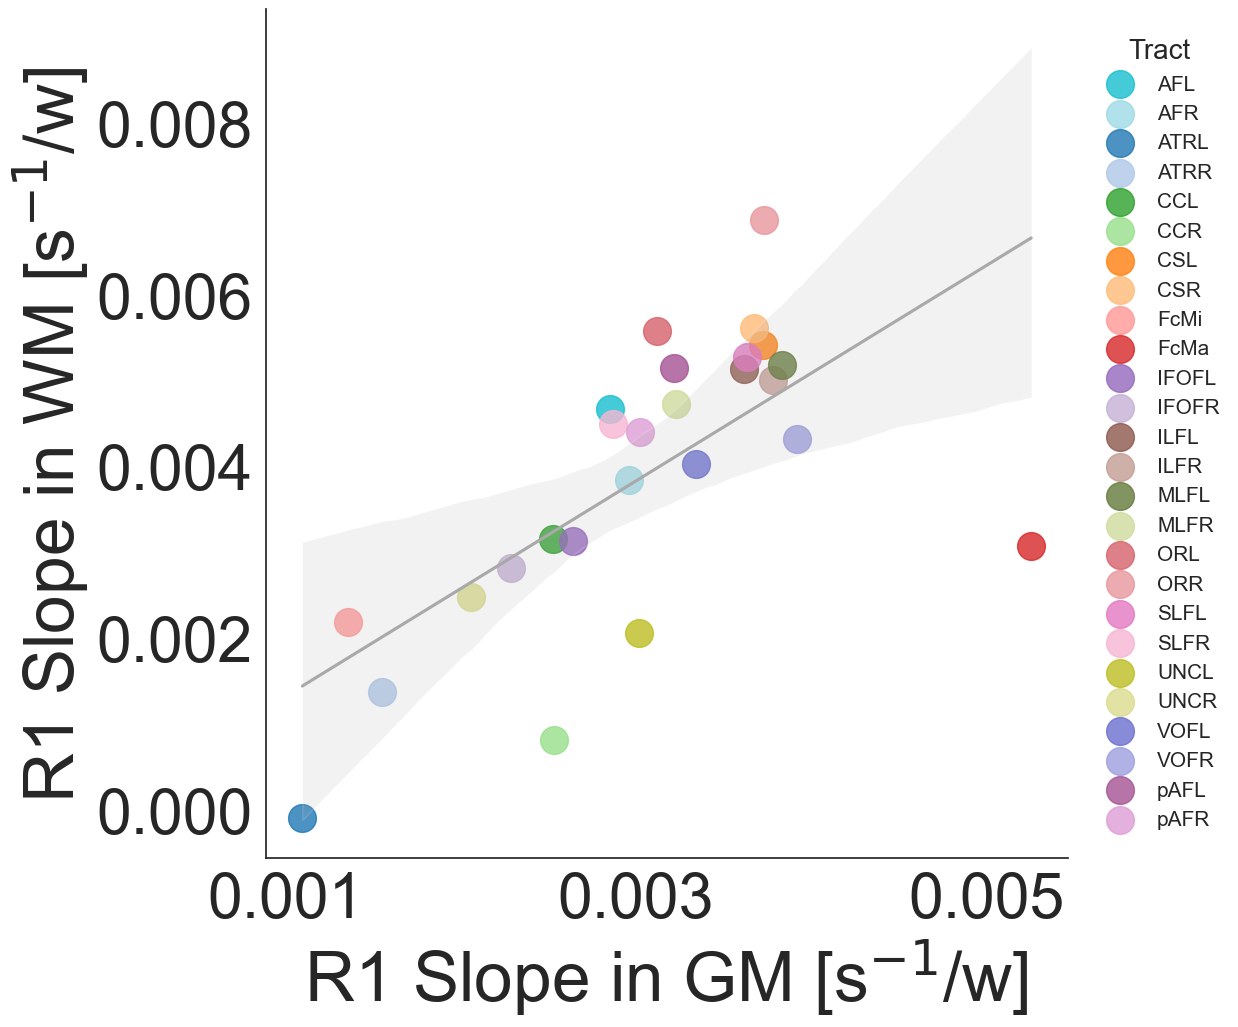

In [17]:
sns.set_style('white');
fig1=sns.lmplot(
    data=SlopeBothR1, x='coeff_GM', y="coeff", hue="tractID", height=10, scatter_kws={"s": 400}, fit_reg=False, legend=False, palette=color_list_chosen
)
fig1=sns.regplot(data=SlopeBothR1, x='coeff_GM', y="coeff", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "darkgrey"})
scipy.stats.pearsonr(SlopeBothR1['coeff_GM'], SlopeBothR1['coeff'])
fig1.legend(title='Tract', fontsize='15', title_fontsize='20', bbox_to_anchor=(0.7, 0.25, 0.5, 0.5), loc='right', borderaxespad=0, frameon=False)
plt.xlabel("R1 Slope in GM [s$^{-1}$/w]", fontsize=50)
plt.ylabel("R1 Slope in WM [s$^{-1}$/w]", fontsize=50)
plt.xticks([0.001, 0.003, 0.005], fontsize=45)
plt.yticks(fontsize=45)
plt.savefig('./figures/R1Slope.png', dpi=600, bbox_inches='tight', pad_inches=0.1)

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='GM_R1'>

<Axes: xlabel='age', ylabel='GM_R1'>

Text(0.5, 1.0, 'AF')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'R1 [s$^{-1}$]')

[Text(40, 0, '40'), Text(42, 0, '42'), Text(44, 0, '44'), Text(46, 0, '46')]

[Text(0, 0.4, '0.4'), Text(0, 0.45, '0.45'), Text(0, 0.5, '0.5')]

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='GM_R1'>

<Axes: xlabel='age', ylabel='GM_R1'>

Text(0.5, 1.0, 'ATR')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'R1 [s$^{-1}$]')

[Text(40, 0, '40'), Text(42, 0, '42'), Text(44, 0, '44'), Text(46, 0, '46')]

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='GM_R1'>

<Axes: xlabel='age', ylabel='GM_R1'>

Text(0.5, 1.0, 'CC')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'R1 [s$^{-1}$]')

[Text(40, 0, '40'), Text(42, 0, '42'), Text(44, 0, '44'), Text(46, 0, '46')]

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='GM_R1'>

<Axes: xlabel='age', ylabel='GM_R1'>

Text(0.5, 1.0, 'CS')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'R1 [s$^{-1}$]')

[Text(40, 0, '40'), Text(42, 0, '42'), Text(44, 0, '44'), Text(46, 0, '46')]

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='GM_R1'>

<Axes: xlabel='age', ylabel='GM_R1'>

Text(0.5, 1.0, 'IFOF')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'R1 [s$^{-1}$]')

[Text(40, 0, '40'), Text(42, 0, '42'), Text(44, 0, '44'), Text(46, 0, '46')]

[Text(0, 0.4, '0.4'), Text(0, 0.45, '0.45'), Text(0, 0.5, '0.5')]

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='GM_R1'>

<Axes: xlabel='age', ylabel='GM_R1'>

Text(0.5, 1.0, 'ILF')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'R1 [s$^{-1}$]')

[Text(40, 0, '40'), Text(42, 0, '42'), Text(44, 0, '44'), Text(46, 0, '46')]

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='GM_R1'>

<Axes: xlabel='age', ylabel='GM_R1'>

Text(0.5, 1.0, 'MLF')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'R1 [s$^{-1}$]')

[Text(40, 0, '40'), Text(42, 0, '42'), Text(44, 0, '44'), Text(46, 0, '46')]

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='GM_R1'>

<Axes: xlabel='age', ylabel='GM_R1'>

Text(0.5, 1.0, 'OR')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'R1 [s$^{-1}$]')

[Text(40, 0, '40'), Text(42, 0, '42'), Text(44, 0, '44'), Text(46, 0, '46')]

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='GM_R1'>

<Axes: xlabel='age', ylabel='GM_R1'>

Text(0.5, 1.0, 'SLF')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'R1 [s$^{-1}$]')

[Text(40, 0, '40'), Text(42, 0, '42'), Text(44, 0, '44'), Text(46, 0, '46')]

[Text(0, 0.4, '0.4'), Text(0, 0.45, '0.45'), Text(0, 0.5, '0.5')]

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='GM_R1'>

<Axes: xlabel='age', ylabel='GM_R1'>

Text(0.5, 1.0, 'UNC')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'R1 [s$^{-1}$]')

[Text(40, 0, '40'), Text(42, 0, '42'), Text(44, 0, '44'), Text(46, 0, '46')]

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='GM_R1'>

<Axes: xlabel='age', ylabel='GM_R1'>

Text(0.5, 1.0, 'VOF')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'R1 [s$^{-1}$]')

[Text(40, 0, '40'), Text(42, 0, '42'), Text(44, 0, '44'), Text(46, 0, '46')]

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='GM_R1'>

<Axes: xlabel='age', ylabel='GM_R1'>

Text(0.5, 1.0, 'pAF')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'R1 [s$^{-1}$]')

[Text(40, 0, '40'), Text(42, 0, '42'), Text(44, 0, '44'), Text(46, 0, '46')]

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='GM_R1'>

Text(0.5, 1.0, 'FcMi')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'R1 [s$^{-1}$]')

[Text(40, 0, '40'), Text(42, 0, '42'), Text(44, 0, '44'), Text(46, 0, '46')]

[Text(0, 0.4, '0.4'), Text(0, 0.45, '0.45'), Text(0, 0.5, '0.5')]

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='R1'>

<Axes: xlabel='age', ylabel='GM_R1'>

Text(0.5, 1.0, 'FcMa')

Text(0.5, 0, 'Scan Age')

Text(0, 0.5, 'R1 [s$^{-1}$]')

[Text(40, 0, '40'), Text(42, 0, '42'), Text(44, 0, '44'), Text(46, 0, '46')]

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

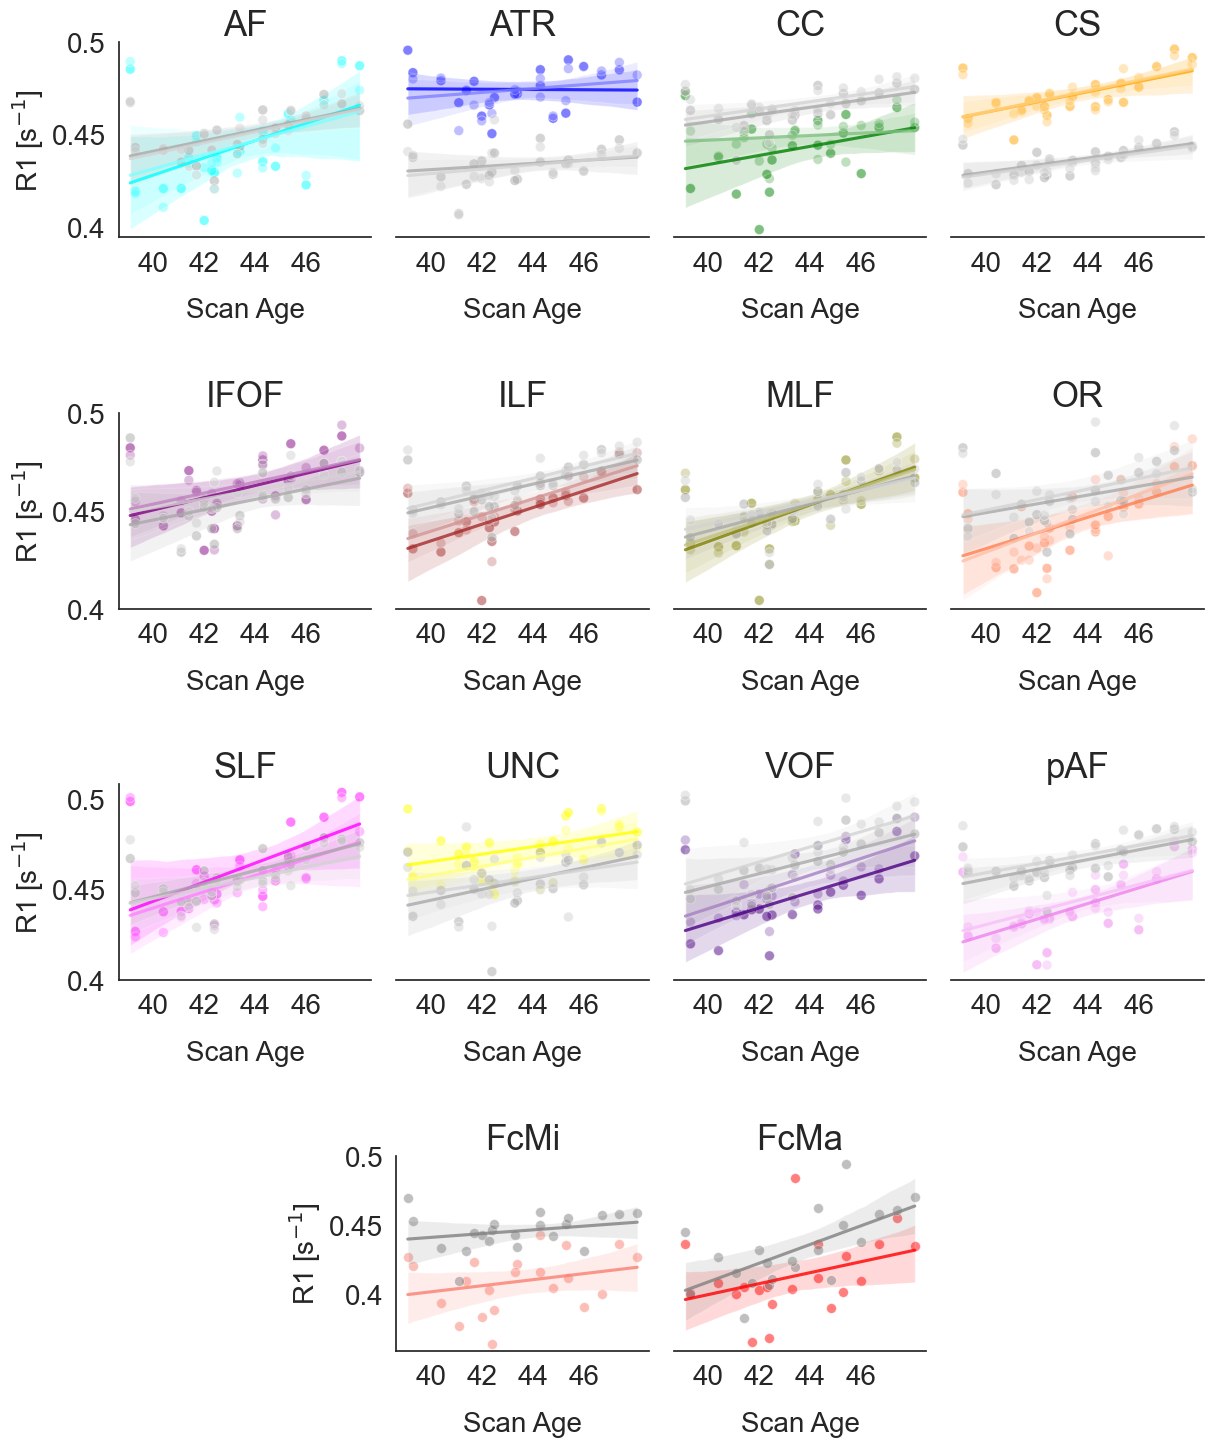

In [18]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors

# --- PREPARE DATA -------------------------------------------------------------
df = SlopeDataframe.copy()

# Extract Hemisphere from tract names (e.g. "AF_L" → "L"); midline bundles will become NaN here
df["Hemisphere"] = df["tractID"].str.extract(r'(L|R)$')

# Extract base bundle name (e.g. "AF_L" → "AF")
df["BundleBase"] = df["tractID"].str.replace(r'(L|R)$', '', regex=True)

# --- DEFINE LAYOUT AND STYLE --------------------------------------------------
tractPosHorz = {
    'AF': (0,0), 'ATR': (0,1), 'CC': (0,2), 'CS': (0,3),
    'IFOF':(1,0), 'ILF':(1,1), 'MLF':(1,2), 'OR':(1,3),
    'SLF':(2,0), 'UNC':(2,1), 'VOF':(2,2), 'pAF':(2,3),
    'FcMi':(3,1), 'FcMa':(3,2)
}

tracts = ['AF', 'ATR', 'CC', 'CS', 'IFOF', 'ILF', 'MLF',
           'OR', 'SLF', 'UNC', 'VOF', 'pAF', 'FcMi', 'FcMa']

colors = ['cyan', 'blue', 'green', 'orange', 'purple', 'brown', 'olive',
           'coral', 'fuchsia', 'yellow', 'indigo', 'violet', 'salmon', 'red']

sns.set(font_scale=2)
sns.set_style("white")

fig, axes = plt.subplots(4, 4, figsize=(14,17), frameon=False)
fig.subplots_adjust(wspace=0.1, hspace=0.9)

def lighten_color(color, amount=0.5):
    """
    Lightens the given color by blending it with white.
    amount=0 → white, amount=1 → original color.
    """
    try:
        c = mcolors.cnames[color]
    except KeyError:
        c = color
    rgb = mcolors.to_rgb(c)
    return tuple(1 - (1 - x) * amount for x in rgb)

# --- MAIN LOOP ---------------------------------------------------------------
midline_bundles = ["FcMi", "FcMa"]   # bundles without L/R hemispheres

for ct, (bundle, color) in enumerate(zip(tracts, colors)):
    # skip if not in layout mapping
    if bundle not in tractPosHorz:
        continue

    ax = axes[tractPosHorz[bundle]]

    # Filter data for this bundle base (works for both midline and hemispheric bundles)
    SlopeTract = df.query("BundleBase == @bundle")

    # If there's no data at all for this bundle, skip plotting (avoid empty panels)
    if SlopeTract.shape[0] == 0:
        ax.text(0.5, 0.5, "No data", ha='center', va='center', transform=ax.transAxes, fontsize=14)
        ax.set_title(bundle, pad=5, fontsize=20)
        ax.set_xticks([])
        ax.set_yticks([])
        continue

    # --- Different grouping for midline vs. hemispheric bundles ----------------
    if bundle in midline_bundles:
        # Group WITHOUT 'Hemisphere' because it's NaN for midline bundles
        SlopeTractWM = (
            SlopeTract
            .groupby(['subjectID', 'age', 'BundleBase'], as_index=False, sort=False)['R1']
            .mean()
        )
        SlopeTractGM = (
            SlopeTract
            .groupby(['subjectID', 'age', 'BundleBase'], as_index=False, sort=False)['GM_R1']
            .mean()
        )

        # Mark as midline for plotting convenience
        SlopeTractWM["Hemisphere"] = "M"
        SlopeTractGM["Hemisphere"] = "M"

        # Plot WM (single color)
        sns.scatterplot(
            data=SlopeTractWM, x='age', y='R1',
            color=color, s=50, alpha=0.5, ax=ax
        )
        sns.regplot(
            data=SlopeTractWM, x='age', y='R1',
            scatter=False, ax=ax,
            line_kws={'color': color, 'alpha': 0.8}
        )

        # Plot GM (single gray color)
        sns.scatterplot(
            data=SlopeTractGM, x='age', y='GM_R1',
            color='gray', s=50, alpha=0.5, ax=ax
        )
        sns.regplot(
            data=SlopeTractGM, x='age', y='GM_R1',
            scatter=False, ax=ax,
            line_kws={'color': 'gray', 'alpha': 0.8}
        )

    else:
        # Hemispheric bundles: group including Hemisphere field
        # Note: groupby will ignore NaN Hemispheres—this is fine because hemispheric bundles should have L/R
        SlopeTractWM = SlopeTract.groupby(
            ['subjectID', 'age', 'BundleBase', 'Hemisphere'],
            as_index=False, sort=False
        )['R1'].mean()

        SlopeTractGM = SlopeTract.groupby(
            ['subjectID', 'age', 'BundleBase', 'Hemisphere'],
            as_index=False, sort=False
        )['GM_R1'].mean()

        light_color = lighten_color(color, amount=0.5)

        # White matter scatter (L/R)
        sns.scatterplot(
            data=SlopeTractWM, x='age', y='R1', hue='Hemisphere', style='Hemisphere',
            markers={'L': 'o', 'R': 'o'}, s=50,
            palette={'L': color, 'R': light_color}, ax=ax,
            alpha=0.5, legend=False
        )

        # Regression lines for L and R (if any data present)
        for hemi, line_color in zip(['L','R'], [color, light_color]):
            hemi_df = SlopeTractWM[SlopeTractWM['Hemisphere'] == hemi]
            if hemi_df.shape[0] > 1:  # need at least 2 points for a regression line
                sns.regplot(
                    data=hemi_df, x='age', y='R1', scatter=False, ax=ax,
                    line_kws={'color': line_color, 'alpha': 0.8}
                )

        # Gray matter scatter & lines
        sns.scatterplot(
            data=SlopeTractGM, x='age', y='GM_R1', hue='Hemisphere', style='Hemisphere',
            markers={'L': 'o', 'R': 'o'}, s=50,
            palette={'L':'darkgray', 'R':'lightgray'}, ax=ax,
            alpha=0.5, legend=False
        )

        for hemi, line_color in zip(['L','R'], ['darkgray','lightgray']):
            hemi_gm = SlopeTractGM[SlopeTractGM['Hemisphere'] == hemi]
            if hemi_gm.shape[0] > 1:
                sns.regplot(
                    data=hemi_gm, x='age', y='GM_R1', scatter=False, ax=ax,
                    line_kws={'color': line_color, 'alpha': 0.8}
                )

    # --- TITLES AND LABELS -----------------------------------------------------
    ax.set_title(bundle, pad=5, fontsize=25)
    ax.set_xlabel('Scan Age', labelpad=15, fontsize=20)

    if ct in [0, 4, 8, 12]:  # first column
        ax.set_ylabel("R1 [s$^{-1}$]", fontsize=20)
        ax.set_xticks([40, 42, 44, 46])
        ax.set_xticklabels([40, 42, 44, 46], fontsize=20)
        ax.set_yticks([0.4, 0.45, 0.5])
        ax.set_yticklabels([0.4, 0.45, 0.5], fontsize=20)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    else:
        ax.set_ylabel('R1 [s$^{-1}$]', fontsize=14)
        ax.set_xticks([40, 42, 44, 46])
        ax.set_xticklabels([40, 42, 44, 46], fontsize=20)
        ax.set_yticks([0.4, 0.45, 0.5])
        ax.yaxis.set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)

    # Clean frame (ensure spines hidden where desired)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Turn off unused axes
axes[3,3].axis("off")
axes[3,0].axis("off")

# --- SAVE & SHOW -------------------------------------------------------------
os.makedirs('./figures', exist_ok=True)
plt.savefig('./figures/R1ScanAge_Hemispheres.png', dpi=600, bbox_inches='tight')
plt.show()